# Movie Analysis

Dataset source: https://www.kaggle.com/datasets/danielgrijalvas/movies

Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)


## Data Extraction

In [2]:
df = pd.read_csv(r'movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning

Find missing data

In [3]:
for col in df.columns:
    missing = df[col].isna().sum()
    print('{} - {}'.format(col, missing))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


Columns data types

In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Changing column data types

In [5]:
df['budget'] = df['budget'].fillna(0).astype(np.int64)
df['gross'] = df['gross'].fillna(0).astype(np.int64)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


Check column validation

In [6]:
(df['year'] == df['released'].str.split(', ').str[1].str.split(' ').str[0]).sum()

0

## Data Wrangling

Sorting based on gross

In [7]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [8]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

## Analysis

Scatter plot of budget vs gross

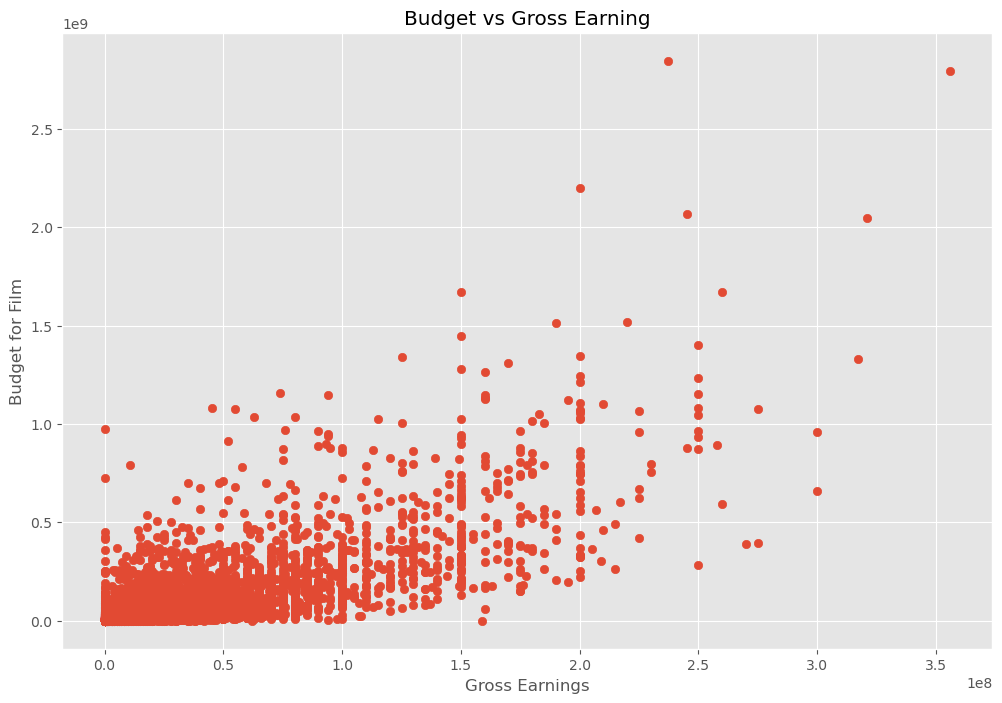

In [9]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


Regression plot of budget vs gross

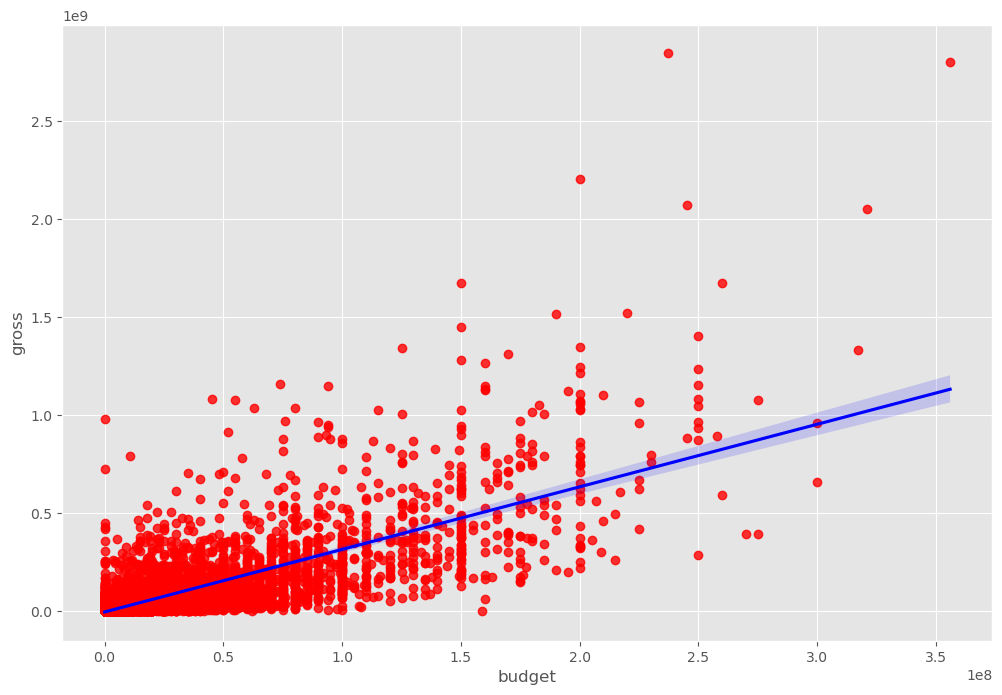

In [11]:
sns.regplot(x='budget', y='gross', data=df, 
            scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

Correlation

In [12]:
df.corr(numeric_only=True, method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


Correlation matrix

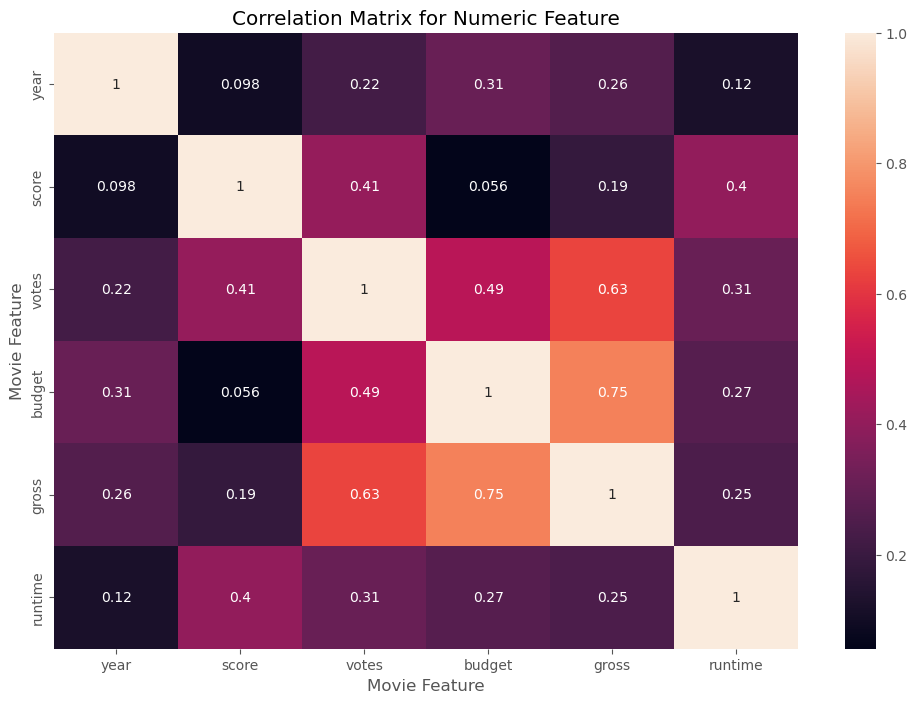

In [13]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Feature')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

Correlation of all columns

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [15]:
df.dtypes.value_counts()

object     9
int64      3
float64    3
Name: count, dtype: int64

In [16]:
df_cat = df.copy()

for col_name in df_cat.columns:
    if(df_cat[col_name].dtype == 'object'):
        df_cat[col_name] = df_cat[col_name].astype('category')
        df_cat[col_name] = df_cat[col_name].cat.codes

df_cat.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


In [17]:
df_cat.dtypes.value_counts()

int16      6
int8       3
int64      3
float64    3
Name: count, dtype: int64

Correlation matrix of all column

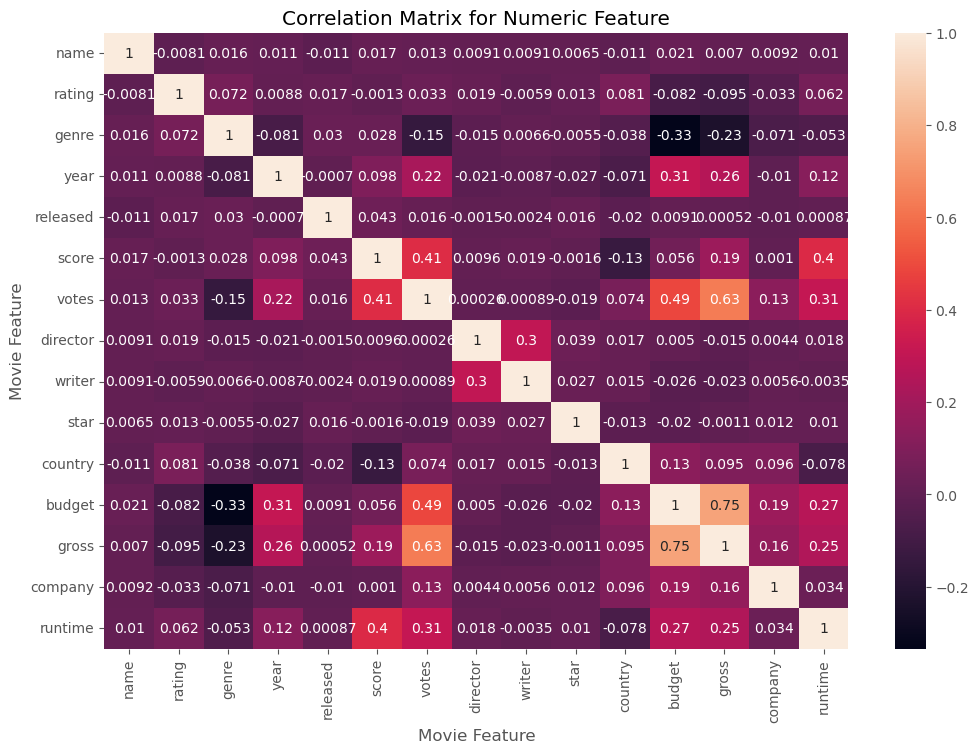

In [18]:
correlation_matrix = df_cat.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Feature')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

In [19]:
df_cat.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174


Unstacking correlation matrix

In [20]:
correlation_mat = df_cat.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.269510
         gross       0.245235
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [21]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

name     name       1.000000
rating   rating     1.000000
company  company    1.000000
gross    gross      1.000000
budget   budget     1.000000
                      ...   
votes    genre     -0.145307
gross    genre     -0.234297
genre    gross     -0.234297
         budget    -0.334021
budget   genre     -0.334021
Length: 225, dtype: float64

Finding high correlation for each column

In [22]:
high_cor = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs != 1)]

high_cor

budget  gross     0.750157
gross   budget    0.750157
        votes     0.632834
votes   gross     0.632834
dtype: float64

Correlation
1. More `budget` can mean better production, marketing, and distribution, leading to more box office `gross`
2. Highly `gross` movies are watched by more people, so they receive more `votes` on platforms like IMDb 

In [23]:
df['genre'].value_counts()

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Sport           1
Music           1
History         1
Name: count, dtype: int64

In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


Bar plot of top 8 most common genres

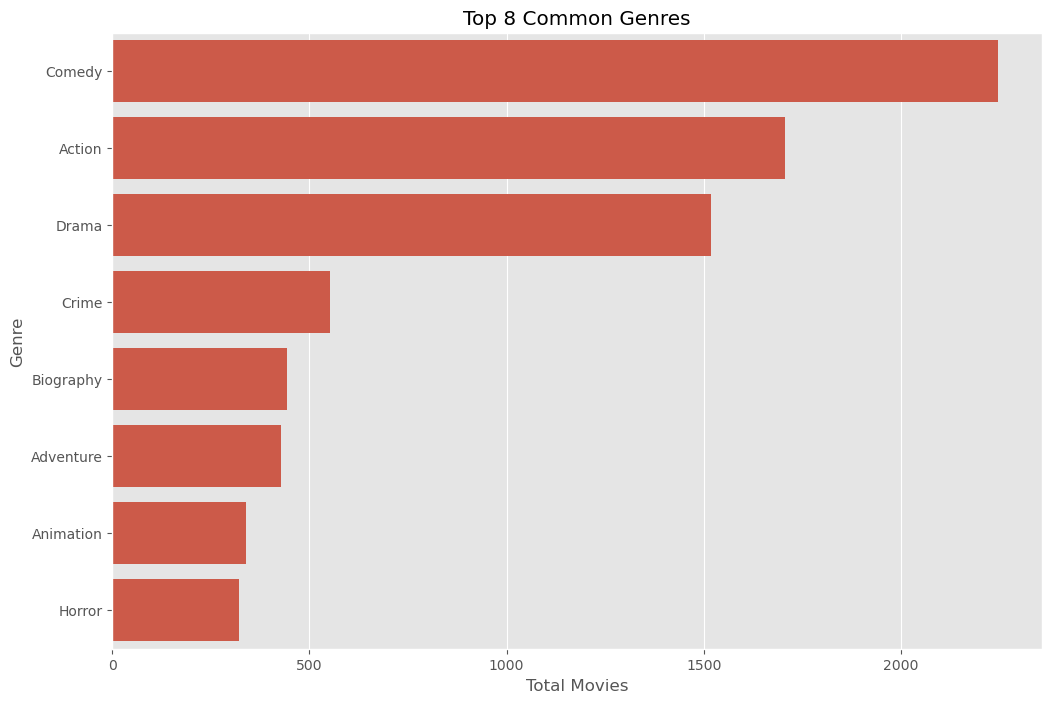

In [25]:
top_genres = df['genre'].value_counts().head(8)

sns.barplot(x=top_genres.values, y=top_genres.index)

plt.title('Top 8 Common Genres')
plt.xlabel('Total Movies')
plt.ylabel('Genre')

plt.show()

In [26]:
df['year'].value_counts(ascending=True)

year
2020     25
1980     92
1981    113
1982    126
1983    144
1984    168
2005    200
1996    200
1998    200
2000    200
1991    200
2009    200
2004    200
1989    200
1995    200
1985    200
1986    200
1988    200
1990    200
1992    200
2002    200
2008    200
2019    200
1997    200
2015    200
2018    200
2012    200
2011    200
2017    200
2013    200
2016    200
2003    200
2014    200
1994    200
2010    200
2006    200
1993    200
1999    200
2001    200
2007    200
1987    200
Name: count, dtype: int64

Line plot of total gross income by year

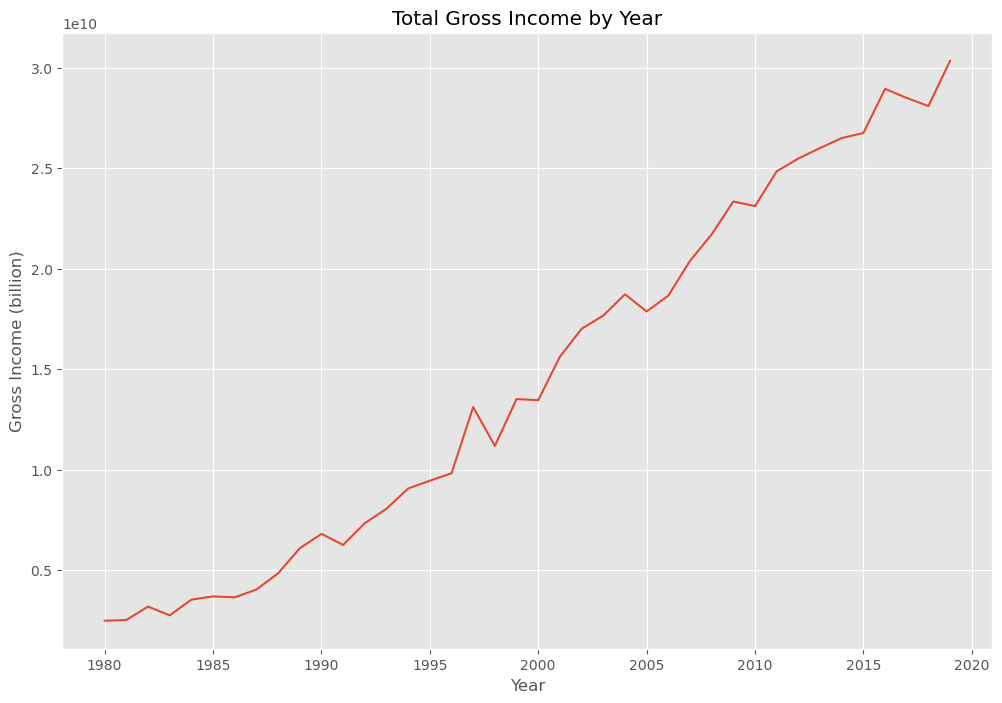

In [27]:
df_filter = df[df['year'] < 2020]
yearly_gross = df_filter.groupby('year')['gross'].sum().reset_index()

sns.lineplot(x='year', y='gross', data=yearly_gross)

plt.title('Total Gross Income by Year')
plt.xlabel('Year')
plt.ylabel('Gross Income (billion)')

plt.show()

Identifying spike

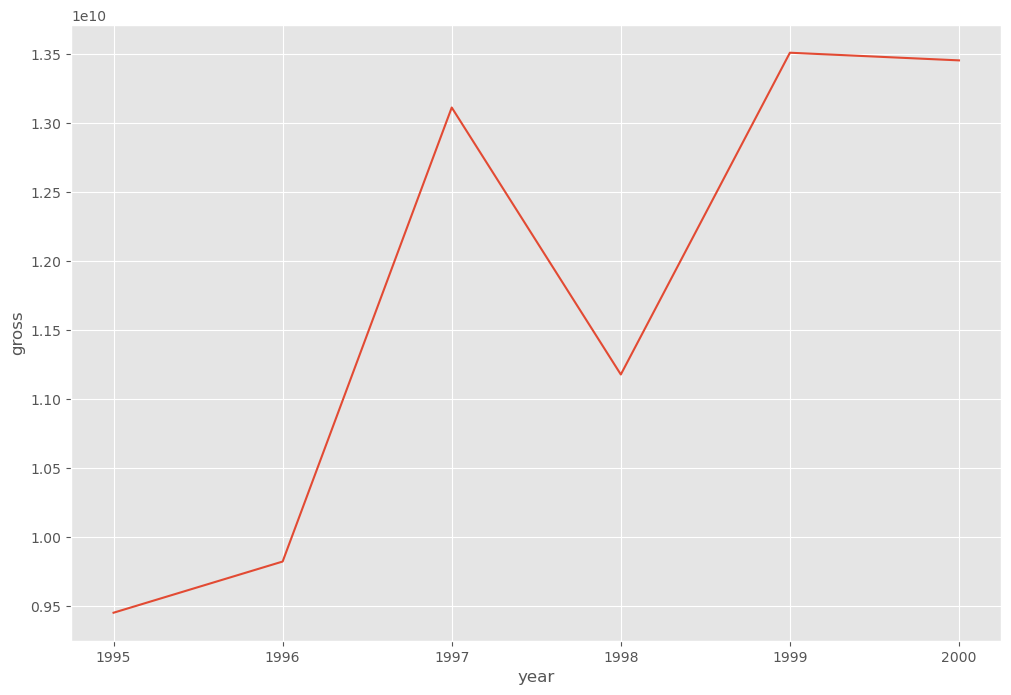

In [28]:
spike_years = df[(df['year'] >= 1995) & (df['year'] <= 2000)]
yearly_spike_gross = spike_years.groupby('year')['gross'].sum().reset_index()

sns.lineplot(x='year', y='gross', data=yearly_spike_gross)
plt.show()

In [29]:
df_filter = df[df['year'] == 1997]
df_filter.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
3064,The Lost World: Jurassic Park,PG-13,Action,1997,"May 23, 1997 (United States)",6.6,388000.0,Steven Spielberg,Michael Crichton,Jeff Goldblum,United States,73000000,618638999,Universal Pictures,129.0
3057,Men in Black,PG-13,Action,1997,"July 2, 1997 (United States)",7.3,529000.0,Barry Sonnenfeld,Lowell Cunningham,Tommy Lee Jones,United States,90000000,589390539,Columbia Pictures,98.0
3085,Tomorrow Never Dies,PG-13,Action,1997,"December 19, 1997 (United States)",6.5,185000.0,Roger Spottiswoode,Bruce Feirstein,Pierce Brosnan,United Kingdom,110000000,333011068,Eon Productions,119.0
3059,Air Force One,R,Action,1997,"July 25, 1997 (United States)",6.5,185000.0,Wolfgang Petersen,Andrew W. Marlowe,Harrison Ford,United States,85000000,315156409,Columbia Pictures,124.0


The reason for the spike in the first spike is because the movie 'Titanic' had significantly higher grossings than the rest of the films released that year. 